# NumPy简介
by Maxwell Margenot

Quantopian系列讲座的一部分:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

笔记在知识共享署名4.0许可下发布。

NumPy是Python中一个非常强大的包，它在Quantopian平台中无处不在。它与pandas有很强的集成，这是我们将在系列讲座中讨论的另一个工具。NumPy增加了对多维数组和数学函数的支持，允许您轻松地执行线性代数计算。这堂课将是使用NumPy计算的线性代数例子的集合。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 基本NumPy数组

我们在金融中使用NumPy最基本的方法是计算投资组合的平均回报。假设我们有一个包含若干股票历史回报率的列表。

In [2]:
stock_list = [3.5, 5, 2, 8, 4.2]

我们可以通过调用列表中的一个函数来创建一个数组:

In [3]:
returns = np.array(stock_list)
print(returns, type(returns)) 

[3.5 5.  2.  8.  4.2] <class 'numpy.ndarray'>


你会注意到数组的类型是`ndarray`而不是`array`。这是因为NumPy数组可以创建多个维度。如果我们传递一个列表的列表列表，它将创建一个二维数组。如果我们传递一个列表的列表的列表，它会创建一个三维数组，等等。

In [4]:
A = np.array([[1, 2], [3, 4]])
print(A, type(A)) 

[[1 2]
 [3 4]] <class 'numpy.ndarray'>


我们可以通过查看数组的`shape`成员变量来访问数组的维数。

In [5]:
print( A.shape)

(2, 2)


数组的索引方式与Python中的列表非常相似。列表的元素从$0$开始索引，以$n - 1$结束，其中$n$是数组的长度。

In [6]:
print(returns[0], returns[len(returns) - 1]) 

3.5 4.2


我们可以使用冒号取数组的一部分，就像在列表中一样.

In [7]:
print (returns[1:3])

[5. 2.]


与列表中一样，数组的一部分将选择数组中的一组元素，从指示的第一个元素开始，一直到(但不包括)指示的最后一个元素。

对于多维数组，许多与切片和索引相同的约定都适用。我们可以像这样访问一个二维数组的第一列:

In [8]:
print (A[:, 0])

[1 3]


二维数组的第一行是这样的:

In [9]:
print (A[0, :])

[1 2]


注意，数组的每个切片都返回另一个数组!

In [10]:
print (type(A[0,:]))

<class 'numpy.ndarray'>


只向二维数组传递一个索引也会返回具有给定索引的行，这为我们提供了访问单个行的另一种方法。

In [11]:
print(A[0]) 

[1 2]


访问单个元素的索引将只返回该元素。

In [12]:
print (A[1, 1])

4


#### 数组函数

内置于NumPy中的函数可以很容易地在数组上调用。大多数函数都应用于数组元素(就像标量乘法一样)。例如，如果我们在一个数组上调用`log()`，则对每个元素取对数。

In [13]:
print (np.log(returns))

[1.25276297 1.60943791 0.69314718 2.07944154 1.43508453]


一些函数返回单个值。这是因为它们将数组视为一个集合(类似于列表)，执行指定的函数。例如，`mean()`函数将执行您所期望的操作，即计算数组的平均值。

In [14]:
print (np.mean(returns))

4.54


或`max()`函数将返回数组的最大元素。

In [15]:
print (np.max(returns))

8.0


要进一步阅读NumPy中的通用函数，请查看[文档](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions)。

### 回到returns

现在让我们用标量值修改我们的returns数组。如果我们向数组中添加一个标量值，它将被添加到数组的每个元素中。如果我们将一个数组乘以一个标量值，它将乘以数组中的每个元素。如果我们两者都做，两者都会发生!

In [16]:
returns*2 + 5

array([12. , 15. ,  9. , 21. , 13.4])

NumPy还具有专门针对数组进行操作的函数。取这组收益率的均值和标准差。

In [17]:
print ("Mean: ", np.mean(returns), "Std Dev: ", np.std(returns))

Mean:  4.54 Std Dev:  1.9915822855207364


让我们使用NumPy的函数来模拟股票的世界。首先，我们需要创建数组来保存用于构建投资组合的资产和收益。这是因为数组的大小是固定的。如果不创建新数组，则无法更改它们的维度。

In [18]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

这个函数`zeroes()`创建一个NumPy数组，其给定的维度完全由$0$填充。我们可以传递一个值，也可以传递一个元组，维度可以任意多。传入元组`(N, 100) `将返回一个二维数组，其中包含$N$行和$100$列。我们的结果是一个$N \times 100$的数组。

现在我们将模拟基础资产。我们希望股票的整体是相互关联的，所以我们将使用这个初始值来生成其他的.

In [19]:
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

NumPy中的`random`模块非常有用。它包含了从许多不同的概率分布中取样的方法，其中一些在[随机变量讲座](https://www.quantopian.com/lectures/random-variables)的中有介绍。在本例中，我们从均值$1.01$和标准差$0.03$的正态分布中抽取$N = 100$的随机样本。我们将这些作为我们资产的日回报率百分比，并将这些样本的累计乘积作为当前价格。

我们生成宇宙的方式是，单个的$R_i$向量是每个一维数组，而`returns`和`assets`变量包含二维数组。上面，我们分别将`returns`和`assets`的初始行设置为第一个$R_i$向量和基于这些return的累积资产价格。

现在，我们将使用这个基础资产创建一些与之相关的其他随机资产。

In [20]:
# Generate assets that are correlated with R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]
print(mean_returns,'%')

[0.9527546767195139, 1.1539026727002133, 0.9759145406925018, 0.960508694643325, 1.0895497360052575, 1.013715488044875, 1.1146475253539068, 1.0540555264001883, 1.2698315681406447, 0.6463460752844208] %


这里，我们通过向$R_1$中添加随机噪声来生成我们想要的其余$N - 1$证券。这确保了我们的$N - 1$其他资产将与基础资产相关，因为它们有一些共享的基础信息。

让我们画出每种资产的平均收益率是什么样子的:

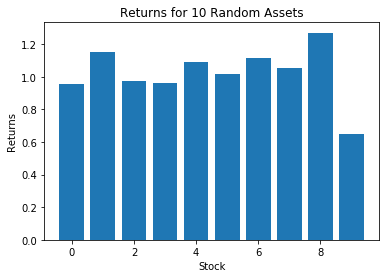

In [21]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

### 计算预期回报

所以我们有一个股票的宇宙。太棒了!现在让我们把它们放在一个投资组合中，计算它的预期回报和风险。

我们将从为我们投资组合中的每种资产生成$N$个随机权重开始。

In [22]:
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)
weights

array([0.11593102, 0.08195162, 0.11161866, 0.11082584, 0.15810164,
       0.06063591, 0.17439023, 0.10159974, 0.03212112, 0.05282423])

我们必须重新调整权重，使它们加起来等于$1$。我们通过将权向量乘以所有权向量的和来做到这一点。此步骤确保我们将使用投资组合中的$100\%$的现金。

要计算投资组合的平均回报，我们必须按每项资产的指定权重来衡量其回报。我们可以提取每个数组的每个元素并将它们单独相乘，但是使用NumPy的线性代数方法会更快。我们想要的函数是`dot()`。这将为我们计算两个数组之间的点积。因此，如果$v = \left[1,2,3 \right]$和$w = \left[4,5,6 \right]$，则:

$$ v \cdot w = 1 \times 4 + 2 \times 5 + 3 \times 6 $$

对于一维向量，点积将每个元素逐点相乘，并将所有乘积相加!在我们的例子中，我们有一个权向量，$\omega = \left[ \omega_1, \omega_2, \dots \omega_N\right]$和一个返回向量，$\mu = \left[ \mu_1, \mu_2, \dots, \mu_N\right]$。如果我们取这两个向量的点积就会得到:

$$ \omega \cdot \mu = \omega_1\mu_1 + \omega_2\mu_2 + \dots + \omega_N\mu_N = \mu_P $$

这就得到了所有资产回报率按各自权重进行缩放的总和。这就是投资组合的整体预期回报!

In [23]:
p_returns = np.dot(weights, mean_returns)
print ("Expected return of the portfolio: ", p_returns)

Expected return of the portfolio:  1.0305311730611413


计算平均回报是相当直观的，不需要太多的线性代数的解释。然而，计算我们投资组合的方差需要更多一点的背景知识。

#### 小心NaN值

大多数情况下，所有这些计算都没有问题。但是，在处理实际数据时，我们会冒数组中有`nan`值的风险。这是NumPy表示数据丢失或不存在的一种方式。这些`nan`值可能导致数学计算中的错误，因此了解数组是否包含`nan`值并知道如何删除它们是很重要的。

In [24]:
v = np.array([1, 2, np.nan, 4, 5])
print (v)

[ 1.  2. nan  4.  5.]


我们来看看取这个数组的均值会发生什么。

In [25]:
print (np.mean(v))

nan


显然，`nan`值对我们的计算有很大的影响。幸运的是，我们可以使用`isnan()`函数检查`nan`值。

In [26]:
np.isnan(v)

array([False, False,  True, False, False])

对数组调用`isnan()`将对数组的每个值调用该函数，如果元素是`nan`则返回`True`，如果元素有效则返回`False`。现在，知道数组是否包含`nan`值是很好的，但是如何删除`nan`呢?足够方便的是，NumPy数组可以通过布尔值(`True`或`False`)建立索引。如果我们使用一个布尔数组来索引一个数组，我们将删除在条件下注册为`False`的数组的所有值。我们在创建一个布尔数组中使用了`isnan()`函数，将`True`值赋给*not*`nan`，将`False`赋给`nan`，然后我们使用它来索引相同的数组。

In [29]:
ix = ~np.isnan(v) # the ~ indicates a logical not, inverting the bools
print (v[ix]) # We can also just write v = v[~np.isnan(v)]

[1. 2. 4. 5.]


In [30]:
print (np.mean(v[ix]))

3.0


这个过程有一些快捷方式，可以使用专门为处理它们而构建的NumPy函数，比如`nanmean()`。

In [31]:
print (np.nanmean(v))

3.0


`nanmean()`函数只是简单地计算数组的平均值，就好像根本没有`nan`值一样!还有一些这样的函数，所以您可以在[文档](https://docs.scipy.org/doc/numpy/user/index.html)中阅读更多关于它们的信息。这些不确定的值比线性代数本身更有问题，所以有办法处理它们是很有帮助的。

### 结论

线性代数在金融和一般情况下都很普遍。例如，根据现代投资组合理论计算*最优*权值是使用线性代数技术完成的。NumPy中的数组和函数允许我们以一种直观的方式处理这些计算。快速介绍线性代数和如何使用NumPy做更重要的矩阵计算，进入下一节。

## 对线性代数的一个简短的尝试

让我们从一些线性代数的基本概述开始。线性代数可以归结为标量和矩阵值的乘法和复合运算。标量值就是一个实数，我们用它乘以一个数组。当我们使用标量缩放一个矩阵或数组时，我们将该矩阵或数组的每个元素乘以标量。

矩阵是值的集合，通常用$m \times n$网格表示，其中$m$表示行数，$n$表示列数。网格长度$m$和$n$不一定是不同的。如果我们有$m = n$，我们称它为方阵。一个特别有趣的矩阵例子是，当$m = 1$或$n = 1$时。在这种情况下，我们有一个矩阵的特殊情况，我们称之为向量。虽然在NumPy中有一个矩阵对象，但我们将使用NumPy数组来完成所有操作，因为它们的维数可以大于$2$。出于本节的目的，我们将交替使用矩阵和数组术语。

我们可以将矩阵方程表示为:

$$ y = A\cdot x $$

其中$A$是$m \times n$矩阵，$y$是$m \times 1$向量，$x$是$n \times 1$向量。在方程的右边我们用一个矩阵乘以一个向量。这需要更多一点的说明，以免我们认为我们可以用任何矩阵乘以任何其他矩阵。

#### 矩阵乘法

在矩阵乘法中，矩阵相乘的顺序很重要。左边的矩阵乘以另一个矩阵可能没问题，但是右边的矩阵可能没有定义。

In [32]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

注意上面定义的矩阵，$A$和$B$，有不同的维数。$A$是$3\times 5$，$B$是$4\times3$。什么可以乘什么不可以乘的一般规则，其顺序取决于矩阵的维数。具体来说，左边矩阵的列数必须等于右边矩阵的行数。在超非正式的术语中，假设我们有一个$m \times n$矩阵和一个$p \times q$矩阵。如果我们用右边的第二个乘以第一个，我们得到如下结果:

$$ (m \times n) \cdot (p \times q) = (m \times q) $$

因此，结果的乘积与左矩阵的行数相同，与右矩阵的列数相同。在编写代码时，跟踪与维相关的矩阵乘法的这种限制非常重要。为了演示这一点，我们使用`dot()`函数来乘下面的矩阵:

In [33]:
print (np.dot(A, B))

ValueError: shapes (3,5) and (4,3) not aligned: 5 (dim 1) != 4 (dim 0)

这些结果符合我们的规则。将右侧的$3 \times 5$矩阵乘以$4 \times 3$矩阵会产生一个错误，而将右侧的$4 \times 3$矩阵乘以$3 \times 5$矩阵会得到一个$4 \times 5$矩阵。

In [34]:
print (np.dot(B, A))

[[ 34  44  54 128 124]
 [ 21  27  33  79  82]
 [ 82 101 120 227 216]
 [108 135 162 333 324]]


### 投资组合的方差

让我们回到之前的投资组合例子。我们计算了投资组合的预期收益，但是如何计算方差呢?我们首先试着将投资组合评估为每一项资产的总和，按其权重进行缩放。

$$ VAR[P] = VAR[\omega_1 S_1 + \omega_2 S_2 + \cdots + \omega_N S_N] $$

其中$S_0, \cdots, S_N$是宇宙中包含的资产。如果我们所有的资产都是相互独立的，我们可以简单地将其估价为

$$ VAR[P] = VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + \cdots + VAR[\omega_N S_N] = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + \cdots + \omega_N^2\sigma_N^2 $$

然而，我们所有的资产都依赖于彼此的建设。它们都在某种程度上与我们的基础资产相关，因此彼此相关。因此，我们必须通过包含每项资产的个别两两协方差来计算投资组合的方差。我们的投资组合方差公式:

$$ VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace $$

期中$\rho_{i,j}$是$S_i$ and $S_j$之间的相关性， $\rho_{i, j} = \frac{COV[S_i, S_j]}{\sigma_i\sigma_j}$。这看起来非常复杂，但是我们可以使用NumPy数组轻松地处理所有这些操作。首先，我们计算协方差矩阵，它与我们的宇宙中所有的个股相关。

In [35]:
cov_mat = np.cov(returns)
print (cov_mat)

[[0.00122281 0.00126161 0.00129262 0.00118212 0.00114087 0.00121041
  0.00129069 0.00131399 0.00117455 0.00124795]
 [0.00126161 0.00171005 0.00133676 0.0012918  0.00117156 0.00131855
  0.00130258 0.00134486 0.00119169 0.0012865 ]
 [0.00129262 0.00133676 0.00187143 0.00119844 0.00117239 0.00129372
  0.00148001 0.00141255 0.00122685 0.00135314]
 [0.00118212 0.0012918  0.00119844 0.00158028 0.00115825 0.00118196
  0.00118069 0.00134198 0.00119955 0.00120752]
 [0.00114087 0.00117156 0.00117239 0.00115825 0.00149247 0.00112984
  0.00116703 0.00118676 0.00111752 0.00119307]
 [0.00121041 0.00131855 0.00129372 0.00118196 0.00112984 0.00166469
  0.00133007 0.0012439  0.00119183 0.00126428]
 [0.00129069 0.00130258 0.00148001 0.00118069 0.00116703 0.00133007
  0.0017984  0.00133745 0.001238   0.00131578]
 [0.00131399 0.00134486 0.00141255 0.00134198 0.00118676 0.0012439
  0.00133745 0.00181498 0.00122805 0.0013827 ]
 [0.00117455 0.00119169 0.00122685 0.00119955 0.00111752 0.00119183
  0.001238   

这个数组的格式不是特别好，但是协方差矩阵是一个非常重要的概念。协方差矩阵的形式为:

$$ \left[\begin{matrix}
VAR[S_1] & COV[S_1, S_2] & \cdots & COV[S_1, S_N] \\
COV[S_2, S_1] & VAR[S_2] & \cdots & COV[S_2, S_N] \\
\vdots & \vdots & \ddots & \vdots \\
COV[S_N, S_1] & COV[S_N, S_2] & \cdots & VAR[S_N]
\end{matrix}\right] $$

每个对角线上的项都是该资产在该下标处的方差,每个非对角线上的项都是两个资产在列和行号上的协方差。重要的是一旦我们有了协方差矩阵我们就能很快地用线性代数来计算整个投资组合的方差。我们可以将组合的方差以数组形式表示为:

$$ \sigma_p^2 = \omega \ C \ \omega^\intercal$$

其中$C$是所有资产的协方差矩阵，$\omega$是包含每个资产权重的数组。上面列出的第二个$\omega$的上标$\intercal$表示$\omega$的**转置**。有关以矩阵方程形式评估投资组合方差的参考资料，请参阅Wikipedia关于[现代投资组合理论](https://en.wikipedia.org/wiki/Modern_portfolio_theory)的文章。

一个数组的转置就是当你交换一个数组的行和列时得到的结果。它的作用是将一个数组反射到你可能想象的对角线上。例如，取之前的数组$A$:

In [36]:
print (A)

[[ 1  2  3 12  6]
 [ 4  5  6 15 20]
 [ 7  8  9 10 10]]


这个转置看起来就像同一个数组的镜像。

In [37]:
print (np.transpose(A))

[[ 1  4  7]
 [ 2  5  8]
 [ 3  6  9]
 [12 15 10]
 [ 6 20 10]]


但是$\omega$这里是一个一维数组，一个向量！取$A$的转置，一个$3 \times 5$数组是最理想的，因为输出将是$5 \times 3$数组，但是一维数组就不那么直观了。一个典型的一维数组可以看作是一个$1 \times n$的水平向量。因此，对这个数组进行变换实际上意味着将它转换成一个$n \times 1$ 垂直向量。这是有意义的，因为一维数组仍然是数组，在一维数组和高维数组之间做的任何乘法都必须符合我们的矩阵乘法的维数问题。

长话短说，我们把$\omega$看成是$1\times N$，因为我们有$N$个有价证券。这使得 $\omega^\intercal$是$N \times 1$。同样，我们的协方差矩阵是$N \times N$。所以总的乘法运算是这样的，在非正式的情况下:

$$ \text{维度}(\sigma_p^2) = \text{维度}(\omega C \omega^\intercal) = (1 \times N)\cdot (N \times N)\cdot (N \times 1) = (1 \times 1)$$

左边的协方差矩阵乘以普通的水平向量，右边的协方差矩阵乘以向量的转置，结果得到一个标量($1 \times 1$)的值，即我们的投资组合的方差.

知道了这些，我们继续计算投资组合的方差!我们可以通过使用`dot()`进行矩阵乘法来轻松地计算这些数组的乘积，尽管这一次我们必须做两次。

In [38]:
# Calculating the portfolio volatility
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print ("Portfolio volatility: ", vol_p)

Portfolio volatility:  0.0360288387428576


为了确认这个计算，让我们简单地使用NumPy函数来评估投资组合的波动性。

In [39]:
# Confirming calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print ("Portfolio volatility: ", vol_p_alt)

Portfolio volatility:  0.03602883874285761


`ddof`参数是一个简单的整数输入，它告诉函数要考虑的自由度的数量。这是一个更具统计意义的概念，但它告诉我们，我们的矩阵计算是正确的!

乍一看，这其中的很多可能没有意义。它有助于在理论和代码表示之间来回转换，直到您对所涉及的数学有了更好的理解。在线性代数和矩阵运算方面绝对没有必要成为专家，但是线性代数可以帮助简化处理大量数据的过程。要进一步阅读NumPy，请查看[文档](https://docs.scipy.org/doc/numpy/user/index.html)。